In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Using All Electronics Dataset:

# Performing EDA on the All Electronics Dataset...

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

file_path = "/content/All Electronics.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 10 records
print(df.head(10))

                                                name        main_category  \
0  Redmi 10 Power (Power Black, 8GB RAM, 128GB St...  tv, audio & cameras   
1  OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...  tv, audio & cameras   
2  OnePlus Bullets Z2 Bluetooth Wireless in Ear E...  tv, audio & cameras   
3  Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...  tv, audio & cameras   
4  OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...  tv, audio & cameras   
5  Redmi 10 Power (Sporty Orange, 8GB RAM, 128GB ...  tv, audio & cameras   
6  boAt Airdopes 141 Bluetooth Truly Wireless in ...  tv, audio & cameras   
7  Apple 20W USB-C Power Adapter (for iPhone, iPa...  tv, audio & cameras   
8  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...  tv, audio & cameras   
9  Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128...  tv, audio & cameras   

      sub_category                                              image  \
0  All Electronics  https://m.media-amazon.com/images/I/81eM15lVcJ...   
1  All

### Dataset Cleaning...

In [ ]:
# Drop rows with any missing values
df_cleaned = df.dropna()

subCat = df['sub_category'].unique()

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Remove unnecessary columns
columns_to_drop = ['sub_category']
df_cleaned = df.drop(columns=columns_to_drop)

# Remove currency symbols and convert price columns to numeric
df_cleaned['discount_price'] = df['discount_price'].replace('[\₹,]', '', regex=True).astype(float)
df_cleaned['actual_price'] = df['actual_price'].replace('[\₹,]', '', regex=True).astype(float)

# Convert numeric columns to the appropriate data type
df_cleaned['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df_cleaned['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')


In [ ]:
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4.0,965,"₹10,999","₹18,999"
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,4.3,"113,956","₹18,999","₹19,999"
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,4.2,"90,304","₹1,999","₹2,299"
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,4.1,"24,863","₹15,999","₹24,999"
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,4.3,"113,956","₹18,999","₹19,999"


In [ ]:
# df_cleaned.head()
colList = ['name', 'main_category','ratings','no_of_ratings','discount_price', 'actual_price']
print(df_cleaned[colList].head(5))

                                                name        main_category  \
0  Redmi 10 Power (Power Black, 8GB RAM, 128GB St...  tv, audio & cameras   
1  OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...  tv, audio & cameras   
2  OnePlus Bullets Z2 Bluetooth Wireless in Ear E...  tv, audio & cameras   
3  Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...  tv, audio & cameras   
4  OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...  tv, audio & cameras   

   ratings  no_of_ratings  discount_price  actual_price  
0      4.0          965.0         10999.0       18999.0  
1      4.3            NaN         18999.0       19999.0  
2      4.2            NaN          1999.0        2299.0  
3      4.1            NaN         15999.0       24999.0  
4      4.3            NaN         18999.0       19999.0  


In [ ]:
print(df['name'].head(10))

0    Redmi 10 Power (Power Black, 8GB RAM, 128GB St...
1    OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...
2    OnePlus Bullets Z2 Bluetooth Wireless in Ear E...
3    Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...
4    OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...
5    Redmi 10 Power (Sporty Orange, 8GB RAM, 128GB ...
6    boAt Airdopes 141 Bluetooth Truly Wireless in ...
7    Apple 20W USB-C Power Adapter (for iPhone, iPa...
8    Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...
9    Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128...
Name: name, dtype: object


In [ ]:
# Function to extract keywords from a text
def extract_keywords(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return list(set(words))  # Convert to set to get unique keywords

# Apply the keyword extraction function to the 'name' column
df_cleaned['keywords'] = df_cleaned['name'].apply(extract_keywords)

# Print the first 10 records and the new 'keywords' column
print("First 10 Records of 'name' column:")
print(df_cleaned['name'].head(10))
print("\nKeywords Column:")
print(df_cleaned['keywords'])

First 10 Records of 'name' column:
0    Redmi 10 Power (Power Black, 8GB RAM, 128GB St...
1    OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...
2    OnePlus Bullets Z2 Bluetooth Wireless in Ear E...
3    Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...
4    OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...
5    Redmi 10 Power (Sporty Orange, 8GB RAM, 128GB ...
6    boAt Airdopes 141 Bluetooth Truly Wireless in ...
7    Apple 20W USB-C Power Adapter (for iPhone, iPa...
8    Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...
9    Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128...
Name: name, dtype: object

Keywords Column:
0       [ram, 128gb, 10, power, 8gb, black, storage, r...
1       [lite, blue, ram, ce, tide, 2, 128gb, 5g, 6gb,...
2       [z2, mins, wireless, bombastic, in, 12, charge...
3       [samsung, travel, mystique, green, galaxy, bat...
4       [dusk, lite, ram, ce, 128gb, 2, 5g, black, 6gb...
                              ...                        
9595    [travel, bts, b

In [ ]:
# Convert specific columns to numeric data type
numeric_columns = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
print(df_cleaned.dtypes)


name               object
main_category      object
image              object
link               object
ratings           float64
no_of_ratings     float64
discount_price    float64
actual_price      float64
keywords           object
dtype: object


In [ ]:
# Fill missing values with mean without inplace
df_cleaned['ratings'] = df_cleaned['ratings'].fillna(df_cleaned['ratings'].mean())
df_cleaned['no_of_ratings'] = df_cleaned['no_of_ratings'].fillna(df_cleaned['no_of_ratings'].mean())
df_cleaned['discount_price'] = df_cleaned['discount_price'].fillna(df_cleaned['discount_price'].mean())
df_cleaned['actual_price'] = df_cleaned['actual_price'].fillna(df_cleaned['actual_price'].mean())


In [ ]:
# Print null count of each column
df_cleaned.isnull().sum()

name              0
main_category     0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
keywords          0
dtype: int64

In [ ]:
print("DataFrame Length:", len(df_cleaned))

DataFrame Length: 9600


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            9600 non-null   object 
 1   main_category   9600 non-null   object 
 2   image           9600 non-null   object 
 3   link            9600 non-null   object 
 4   ratings         9600 non-null   float64
 5   no_of_ratings   9600 non-null   float64
 6   discount_price  9600 non-null   float64
 7   actual_price    9600 non-null   float64
 8   keywords        9600 non-null   object 
dtypes: float64(4), object(5)
memory usage: 675.1+ KB


In [ ]:
df_cleaned.describe()

,ratings,no_of_ratings,discount_price,actual_price
count,9600.000000,9600.000000,9600.000000,9600.000000
mean,4.077576,306.304696,2976.275592,5009.698254
std,0.374843,193.549778,8639.082346,12164.404252
min,1.000000,1.000000,10.000000,20.000000
25%,3.900000,242.000000,299.000000,849.000000
50%,4.100000,306.304696,620.500000,1499.000000
75%,4.300000,306.304696,1895.500000,3499.000000
max,5.000000,999.000000,134999.000000,161999.000000


### Descriptive statistics

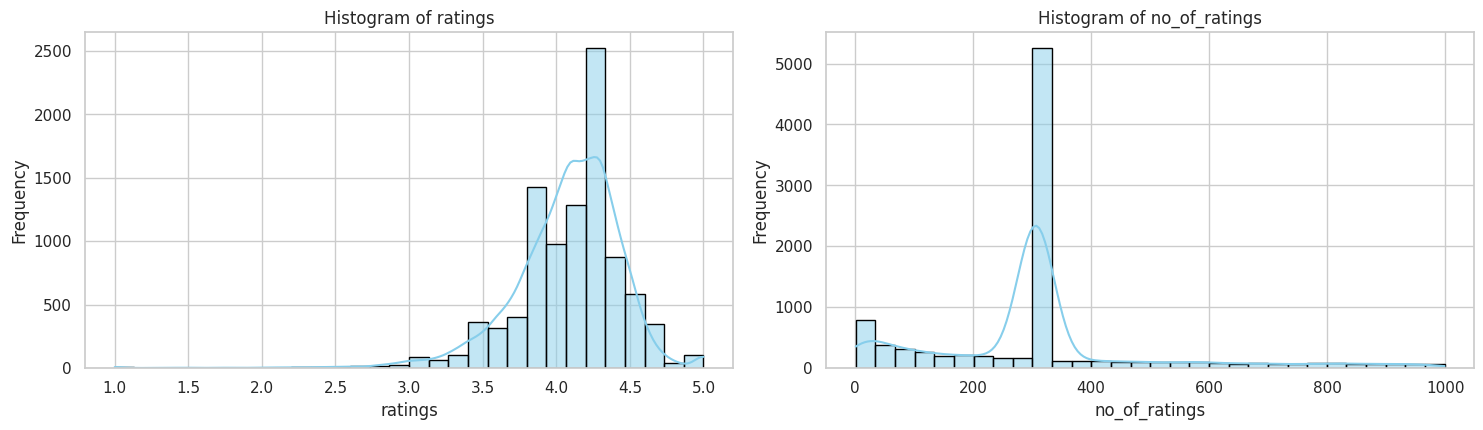

In [ ]:
# Descriptive statistics for numeric columns
numeric_columns = ['ratings', 'no_of_ratings']
numeric_data = df_cleaned[numeric_columns].replace([np.inf, -np.inf], np.nan).apply(pd.to_numeric, errors='coerce')

# Plot histograms for each numeric column
plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(numeric_data[column].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

top_10_products :  667     Onsitego 1 Year Extended Warranty for Small Ho...
809     SD CASS® Hanging Car Rear View Mirror Mobile P...
982     ZEBRONICS Zeb- Haze 2.4GHz Wireless Mouse with...
984     ZEBRONICS Zeb- Haze 2.4GHz Wireless Mouse with...
987     Portronics Clean M Multifunctional 8-in-1 Gadg...
1581    ZEBRONICS Zeb- Haze 2.4GHz Wireless Mouse with...
2046    Original 65w Warp Charger for One Plus For One...
2123    ZEBRONICS Zeb- Haze 2.4GHz Wireless Mouse with...
2185    Yorten Universal Clip Cell Phone Holder Multi-...
2241    Magnetic Wireless Charger 3 in 1-15W Wireless ...
Name: name, dtype: object


<ipython-input-88-bdfc4c8aff1f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ratings', y='name', data=top_10_products, palette='viridis')


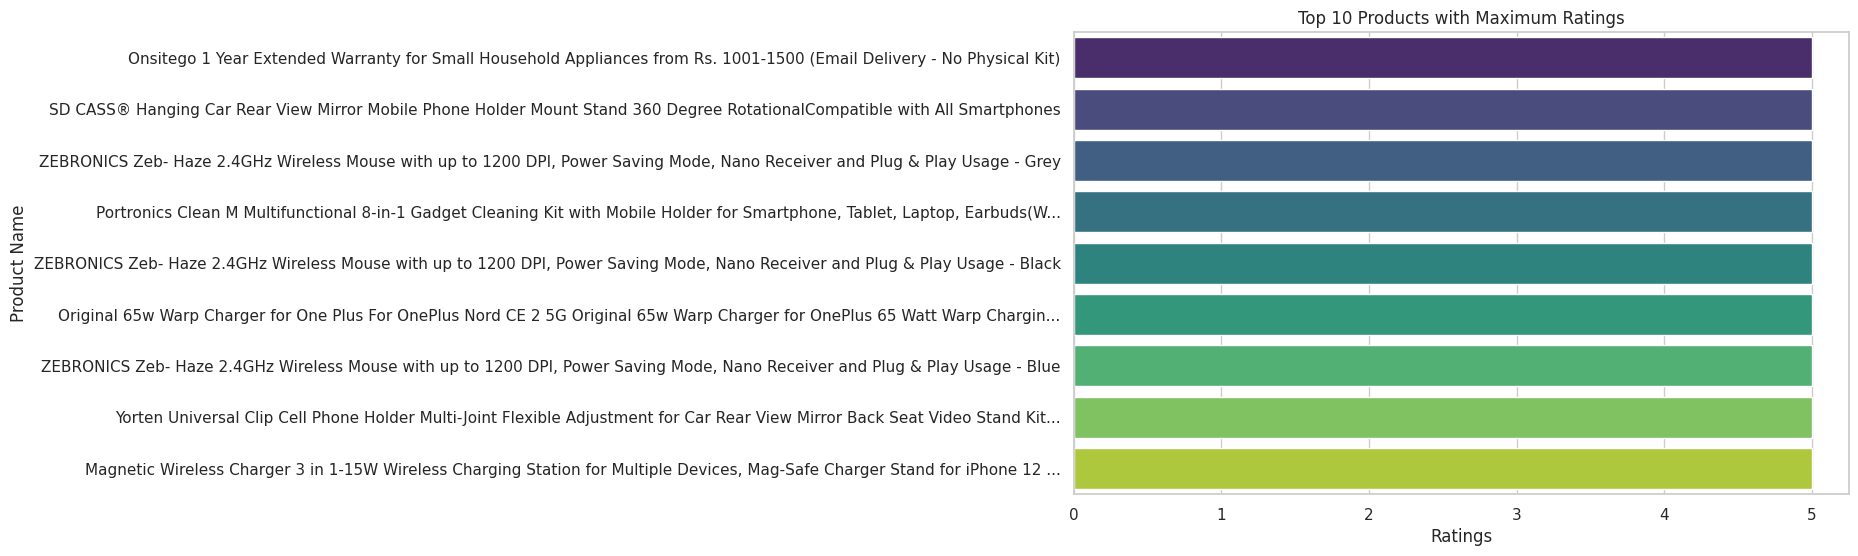

In [ ]:
# Select the top 10 products with max ratings
top_10_products = df_cleaned.nlargest(10, 'ratings')

print("top_10_products : ", top_10_products['name'])

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings', y='name', data=top_10_products, palette='viridis')
plt.xlabel('Ratings')
plt.ylabel('Product Name')
plt.title('Top 10 Products with Maximum Ratings')
plt.show()

<ipython-input-89-cd06a3c2c4cc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount_price', y='name', data=top_10_max_discount, palette='viridis')


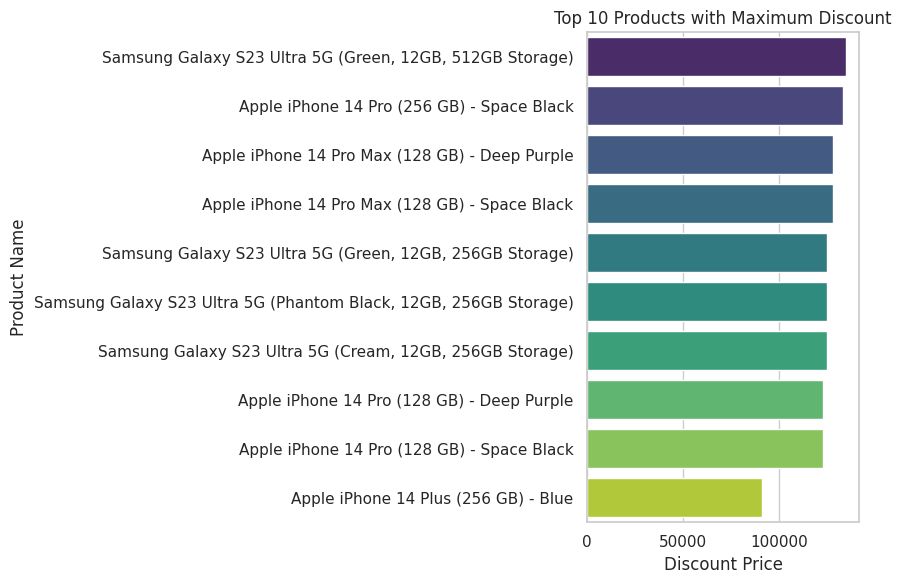

In [ ]:
# Select the top 10 products with max discount
top_10_max_discount = df_cleaned.nlargest(10, 'discount_price')

# Select the top 10 products with least discount
top_10_least_discount = df_cleaned.nsmallest(10, 'discount_price')

# Plot horizontal bar chart for top 10 products with max discount
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='discount_price', y='name', data=top_10_max_discount, palette='viridis')
plt.xlabel('Discount Price')
plt.ylabel('Product Name')
plt.title('Top 10 Products with Maximum Discount')



plt.tight_layout()
plt.show()

<ipython-input-90-d8703f1f14b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount_price', y='name', data=top_10_least_discount, palette='viridis')


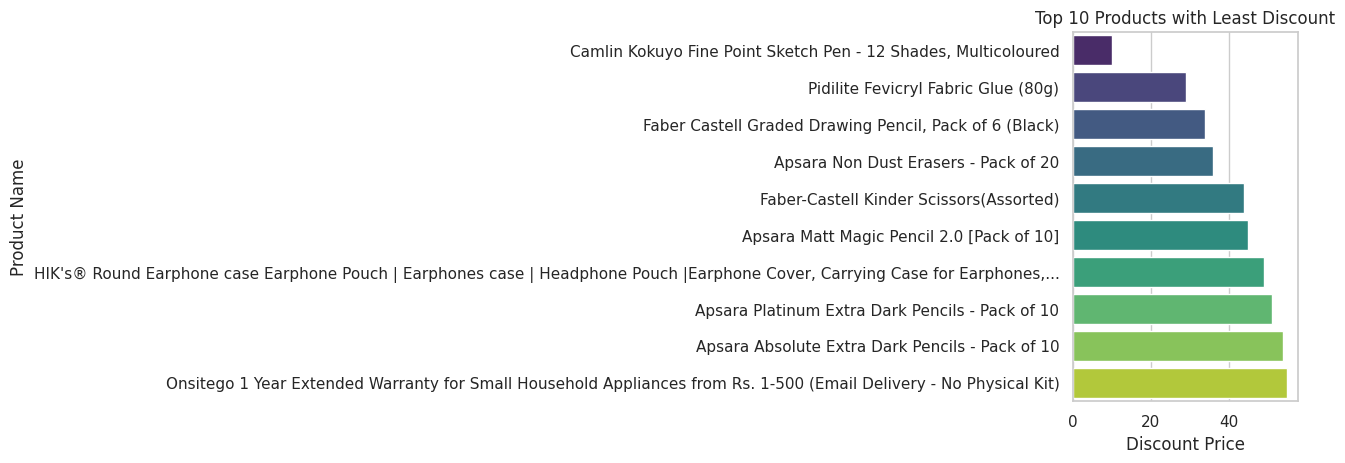

In [ ]:
# Plot horizontal bar chart for top 10 products with least discount
plt.subplot(1, 2, 2)
sns.barplot(x='discount_price', y='name', data=top_10_least_discount, palette='viridis')
plt.xlabel('Discount Price')
plt.ylabel('Product Name')
plt.title('Top 10 Products with Least Discount')

# plt.tight_layout()
plt.show()

# Model Build:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Sample dataset
data = {'name': [
    'Redmi 10 Power (Power Black, 8GB RAM, 128GB Storage)',
    'OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM, ...)',
    'OnePlus Bullets Z2 Bluetooth Wireless in Ear Earphones',
    'Samsung Galaxy M33 5G (Mystique Green, 6GB, 128GB Storage)',
    'OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM, ...)',
    'Redmi 10 Power (Sporty Orange, 8GB RAM, 128GB Storage)',
    'boAt Airdopes 141 Bluetooth Truly Wireless in Ear Earbuds',
    'Apple 20W USB-C Power Adapter (for iPhone, iPad)',
    'Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch',
    'Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128GB Storage)'
],
'category': ['phone', 'phone', 'bluetooth', 'phone', 'phone', 'phone', 'bluetooth', 'adaptor', 'watch', 'phone']
}

df = pd.DataFrame(data)

In [ ]:
# Basic setup
X_train, X_test, y_train, y_test = train_test_split(df['name'], df['category'], test_size=0.2, random_state=42)

# Train model
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
# Save model
model_filename = 'product_category_model.joblib'
joblib.dump(model, model_filename)


['product_category_model.joblib']

In [ ]:
# Model inference testing
test_product_names = [
    'Sony Noise Cancelling Headphones WH1000XM3',
    'Canon EOS 5D Mark IV Full Frame Digital SLR Camera',
    'Fitbit Charge 4 Fitness and Activity Tracker with Built-in GPS',
    'Samsung Galaxy Watch 4 Classic',
    'Anker PowerCore 10000 Portable Charger'
]

# Load saved model
loaded_model = joblib.load(model_filename)

# Make predictions
predictions = loaded_model.predict(test_product_names)


# Print predictions
print("\nInference Testing:", predictions)
for product, prediction in zip(test_product_names, predictions):
    print(f"Product: {product}, Predicted Category: {prediction}")


Inference Testing: ['phone' 'phone' 'bluetooth' 'phone' 'phone']
Product: Sony Noise Cancelling Headphones WH1000XM3, Predicted Category: phone
Product: Canon EOS 5D Mark IV Full Frame Digital SLR Camera, Predicted Category: phone
Product: Fitbit Charge 4 Fitness and Activity Tracker with Built-in GPS, Predicted Category: bluetooth
Product: Samsung Galaxy Watch 4 Classic, Predicted Category: phone
Product: Anker PowerCore 10000 Portable Charger, Predicted Category: phone


In [ ]:
input_product_name = ['Redmi 10 Power (Power Black, 8GB RAM, 128GB Storage)']

# Make predictions
predictions = loaded_model.predict(input_product_name)

# Print predictions
print("Inference Testing:")
for product, prediction in zip(input_product_name, predictions):
    print(f"Product: {product}, Predicted Category: {prediction}")

Inference Testing:
Product: Redmi 10 Power (Power Black, 8GB RAM, 128GB Storage), Predicted Category: phone


In [ ]:
# Apply the model on the 'name' column
df_cleaned['predProdCat'] = loaded_model.predict(df_cleaned['name'])

In [ ]:
df_cleaned.head()

,name,main_category,image,link,ratings,no_of_ratings,discount_price,actual_price,keywords,predProdCat
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4.0,965.000000,10999.0,18999.0,"[ram, 128gb, 10, power, 8gb, black, storage, r...",phone
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,4.3,306.304696,18999.0,19999.0,"[lite, blue, ram, ce, tide, 2, 128gb, 5g, 6gb,...",phone
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,4.2,306.304696,1999.0,2299.0,"[z2, mins, wireless, bombastic, in, 12, charge...",bluetooth
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,4.1,306.304696,15999.0,24999.0,"[samsung, travel, mystique, green, galaxy, bat...",phone
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,4.3,306.304696,18999.0,19999.0,"[dusk, lite, ram, ce, 128gb, 2, 5g, black, 6gb...",phone


<ipython-input-98-a34470ecfd47>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


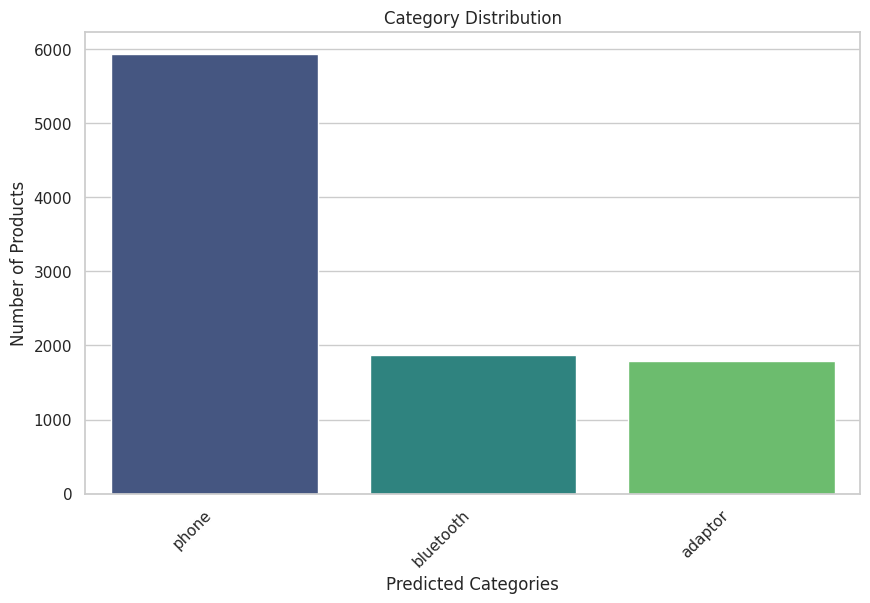

In [ ]:
# Category Distribution
category_counts = df_cleaned['predProdCat'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Predicted Categories')
plt.ylabel('Number of Products')
plt.title('Category Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-99-90a11c86ed85>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings_per_category.index, y=avg_ratings_per_category.values, palette='viridis')


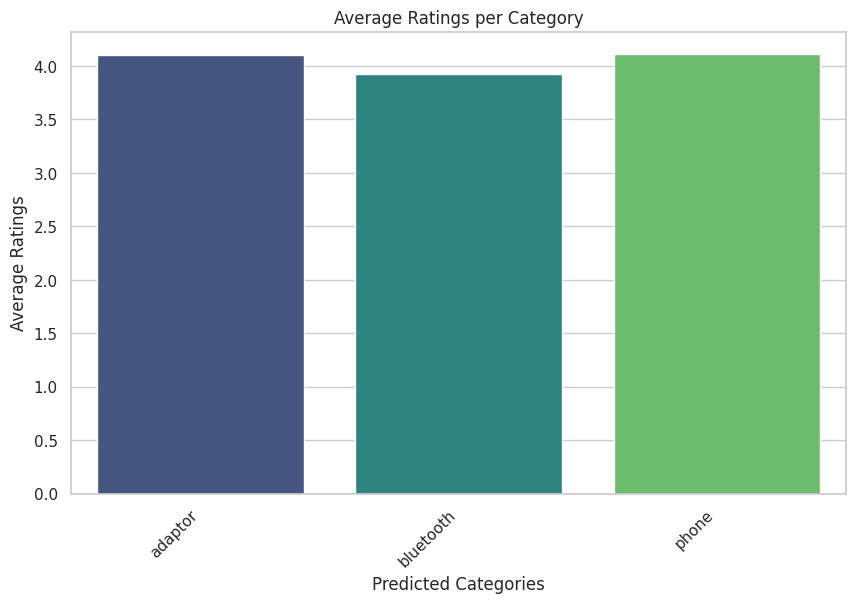

In [ ]:
# Average Ratings per Category
avg_ratings_per_category = df_cleaned.groupby('predProdCat')['ratings'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings_per_category.index, y=avg_ratings_per_category.values, palette='viridis')
plt.xlabel('Predicted Categories')
plt.ylabel('Average Ratings')
plt.title('Average Ratings per Category')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-100-d7d94e4f13cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predProdCat', y='discount_price', data=df_cleaned, palette='viridis')


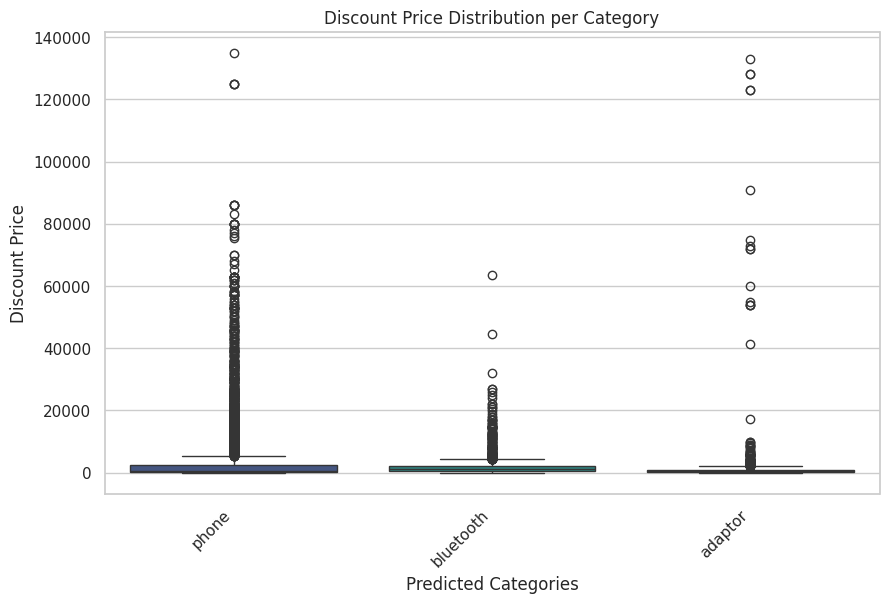

In [ ]:
# Discount Price Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='predProdCat', y='discount_price', data=df_cleaned, palette='viridis')
plt.xlabel('Predicted Categories')
plt.ylabel('Discount Price')
plt.title('Discount Price Distribution per Category')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-101-4352abfcd948>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='predProdCat', y='no_of_ratings', data=df_cleaned, palette='viridis')


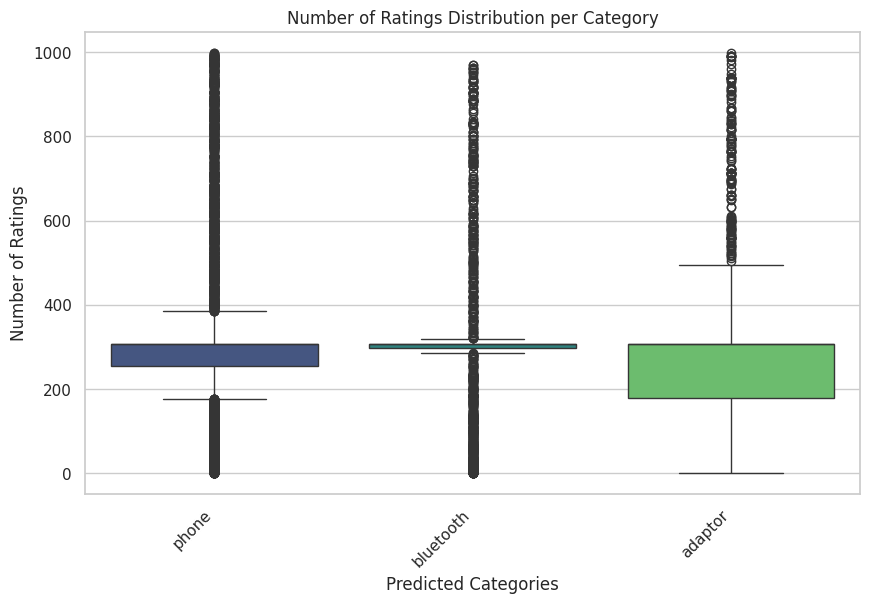

In [ ]:
# Number of Ratings Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='predProdCat', y='no_of_ratings', data=df_cleaned, palette='viridis')
plt.xlabel('Predicted Categories')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings Distribution per Category')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-102-410c5307cc91>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount_percentage_per_category.index, y=avg_discount_percentage_per_category.values, palette='viridis')


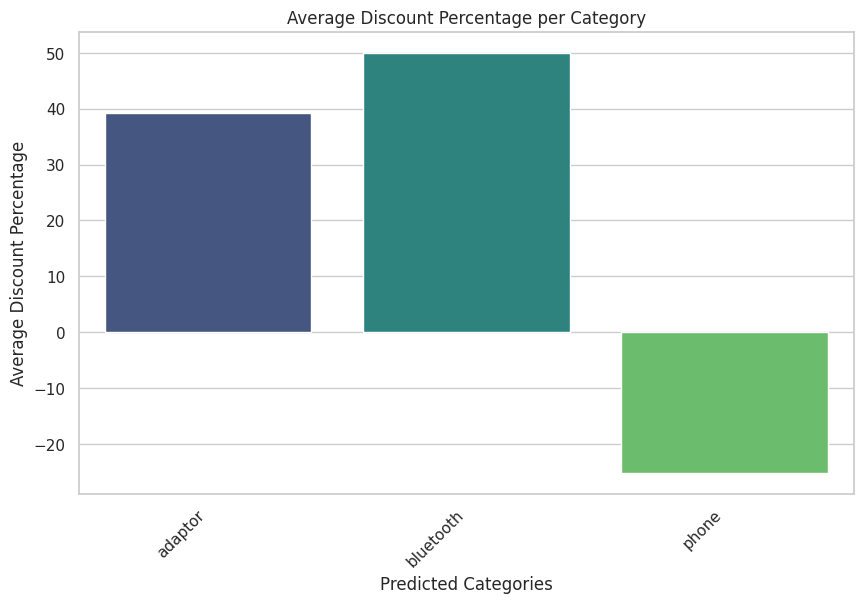

In [ ]:
# Average Discount Percentage per Category
df_cleaned['discount_percentage'] = ((df_cleaned['actual_price'] - df_cleaned['discount_price']) / df_cleaned['actual_price']) * 100
avg_discount_percentage_per_category = df_cleaned.groupby('predProdCat')['discount_percentage'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_discount_percentage_per_category.index, y=avg_discount_percentage_per_category.values, palette='viridis')
plt.xlabel('Predicted Categories')
plt.ylabel('Average Discount Percentage')
plt.title('Average Discount Percentage per Category')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-103-649754d14583>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_actual_price_per_category.index, y=avg_actual_price_per_category.values, palette='viridis')


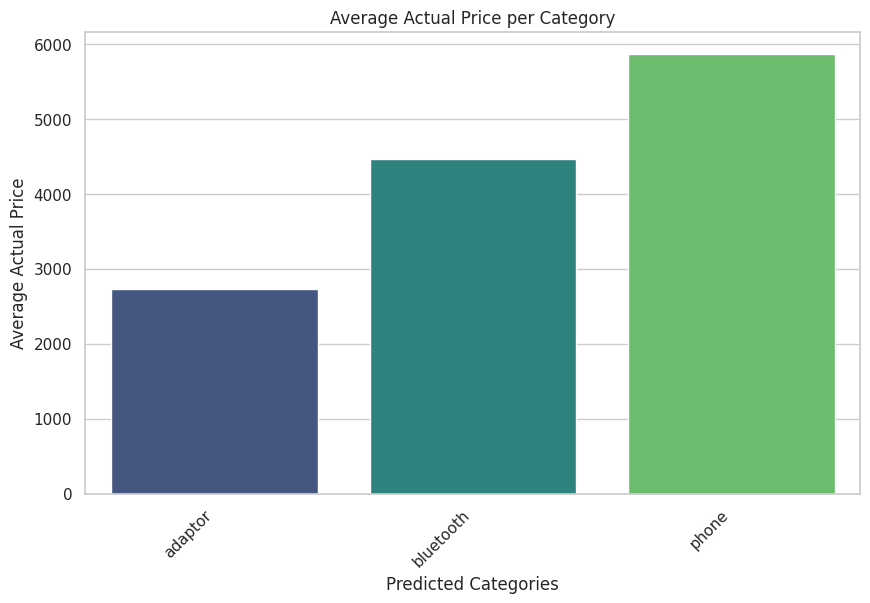

In [ ]:
# Average Actual Price per Category
avg_actual_price_per_category = df_cleaned.groupby('predProdCat')['actual_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_actual_price_per_category.index, y=avg_actual_price_per_category.values, palette='viridis')
plt.xlabel('Predicted Categories')
plt.ylabel('Average Actual Price')
plt.title('Average Actual Price per Category')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-104-46ad6324d309>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discounted_products_percentage_per_category.index, y=discounted_products_percentage_per_category.values, palette='viridis')


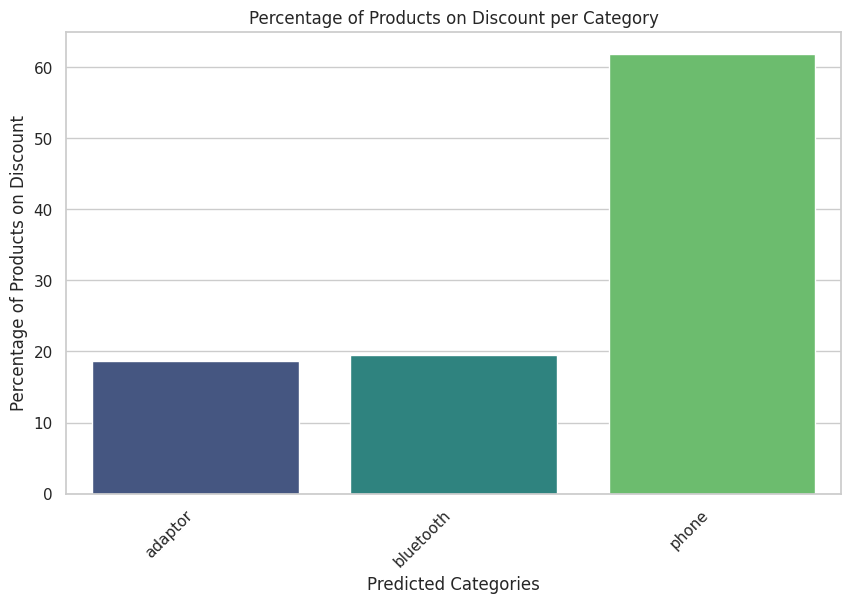

In [ ]:
# Percentage of Products on Discount per Category
discounted_products_percentage_per_category = (df_cleaned.groupby('predProdCat')['discount_price'].count() / len(df_cleaned)) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=discounted_products_percentage_per_category.index, y=discounted_products_percentage_per_category.values, palette='viridis')
plt.xlabel('Predicted Categories')
plt.ylabel('Percentage of Products on Discount')
plt.title('Percentage of Products on Discount per Category')
plt.xticks(rotation=45, ha='right')
plt.show()
